# 과제. 따릉이 대여량 예측하기

## 데이터 전처리

데이터 변수 설명
- Date : 연월일
- Rented Bike count - 매 시간마다 대여한 자전거 수
- Hour - 하루 중 시간
- Temperature - 온도
- Humidity - 습도 %
- Windspeed - 풍속 m/s
- Visibility - 가시거리 m
- Dew point temperature - 이슬점 온도
- Solar radiation - 태양 복사 MJ/m2
- Rainfall - 강우량 mm
- Snowfall - 적설량 cm
- Seasons - 겨울, 봄, 여름, 가을
- Holiday - 휴일/휴일 없음
- Functional Day - 운영되지 않았던 날, 정상적으로 운영된 날

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\강태희\AppData\Local\Temp\ipykernel_23716\1557408062.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [11]:
# train data 불러오기

df_train = pd.read_csv("C:/Users/강태희/Documents/data/train.csv")
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
df_train.tail()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8039,31/10/2018,798,23,6.4,60,1.8,1930,-0.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
df_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [15]:
# 결측값 개수 확인하기 
# Temperature, Wind speed, Seasons 에서 결측값 있는걸 확인함, 결측값 처리하기

df_train.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [16]:
# 보간법으로 Temperature와 Wind speed 결측값 채우기

df_train['Temperature(째C)'] = df_train['Temperature(째C)'].interpolate(method='linear')
df_train['Wind speed (m/s)'] = df_train['Wind speed (m/s)'].interpolate(method='linear')

In [17]:
# Seasons의 결측값 채우기

# 먼저 Date 열을 datetime 형식으로 변환
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%d/%m/%Y')

# 월을 추출해서 계절을 정의하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Seasons 결측값만 해당 함수로 채우기
df_train['Seasons'] = df_train['Seasons'].fillna(df_train['Date'].dt.month.map(get_season))

In [18]:
df_train.head(5)

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [19]:
# 결측값 처리됐는지 확인하기

df_train.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [21]:
display(df_train.head())
display(df_train.tail())

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,1,0,0


,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8035,2018-10-31,1507,19,8.4,53,1.066667,2000,-0.6,0.0,0.0,0.0,4,0,0
8036,2018-10-31,1176,20,7.6,59,0.700000,2000,0.0,0.0,0.0,0.0,4,0,0
8037,2018-10-31,1069,21,7.6,59,3.000000,1929,0.0,0.0,0.0,0.0,4,0,0
8038,2018-10-31,1088,22,6.8,58,2.200000,1936,-0.9,0.0,0.0,0.0,4,0,0
8039,2018-10-31,798,23,6.4,60,1.800000,1930,-0.8,0.0,0.0,0.0,4,0,0


### 가설 설정하기

- 퇴근시간에 자전거 대여량이 많을 것이다
- 기온이 높을수록 자전거 대여량이 많을 것이다
- 풍속이 낮을수록 자전거 대여량이 많을 것이다

Text(0.5, 1.0, 'Holiday barplot')

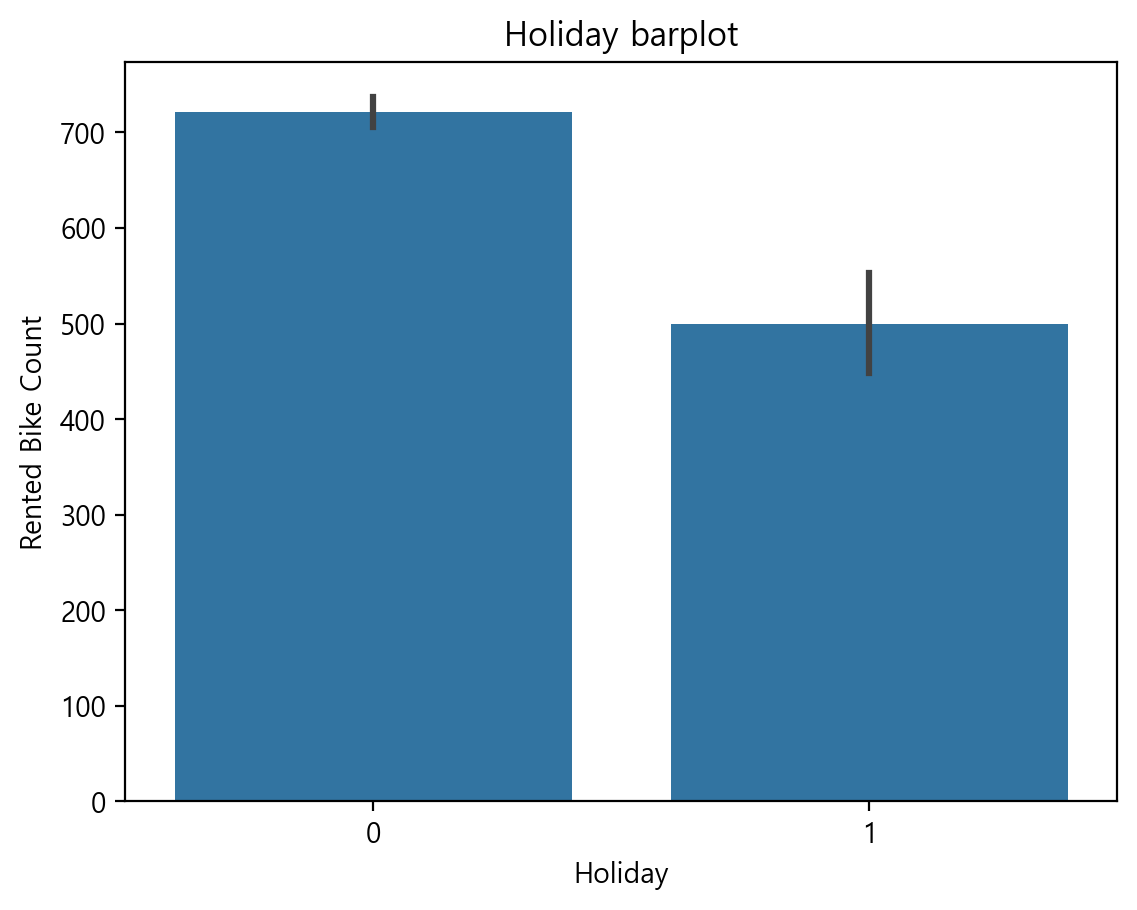

In [22]:
# 공휴일과 자전거 대여량 간 관계 파악하기

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Holiday',y='Rented Bike Count', data=df_train)
plt.title("Holiday barplot")

Text(0, 0.5, '대여한 자전거 수')

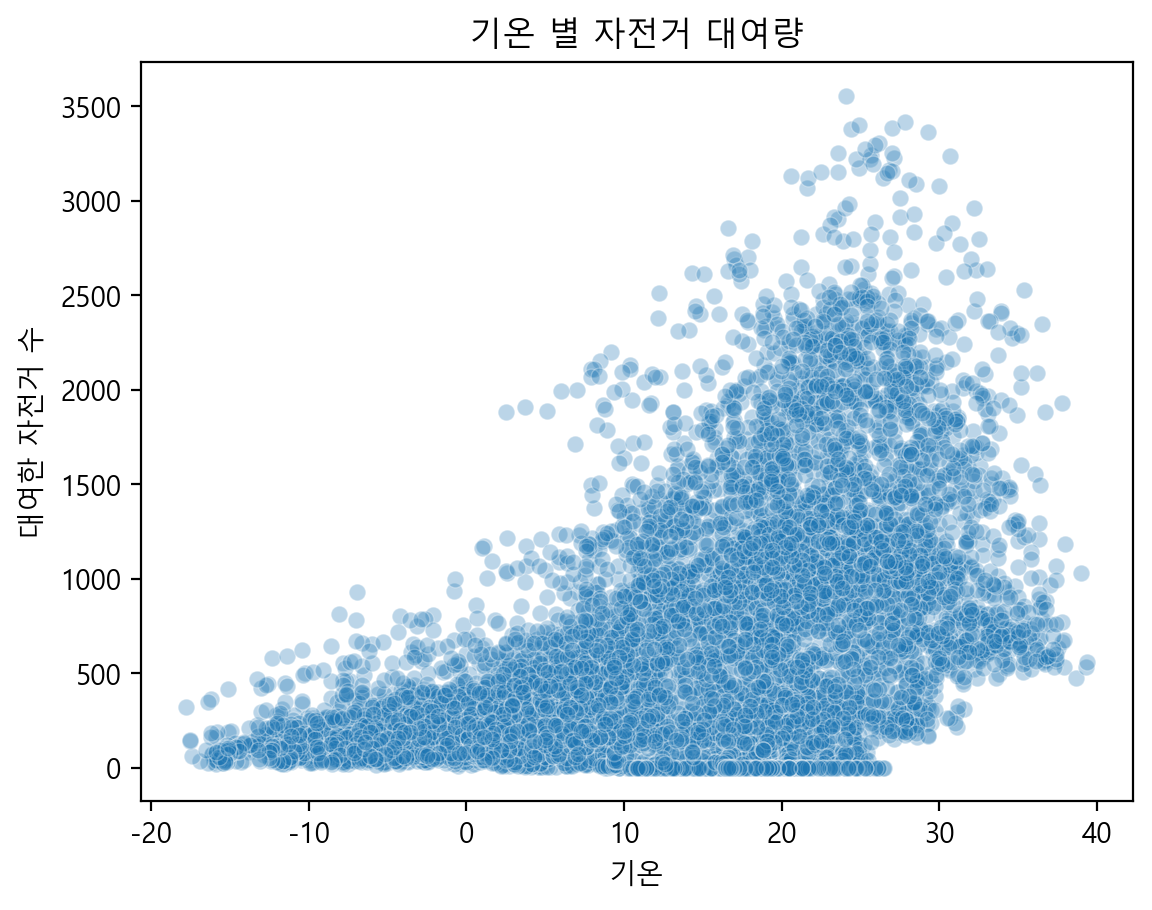

In [23]:
# 기온에 따른 자전거 대여량 나타내기
# 기온이 높을수록 (기온이 따듯할수록) 자전거 대여량이 높다는걸 확인할 수 있음

sns.scatterplot(x='Temperature(째C)', y='Rented Bike Count', data=df_train, alpha=0.3)
plt.title("기온 별 자전거 대여량")
plt.xlabel('기온')
plt.ylabel('대여한 자전거 수')

Text(0, 0.5, '대여한 자전거 수')

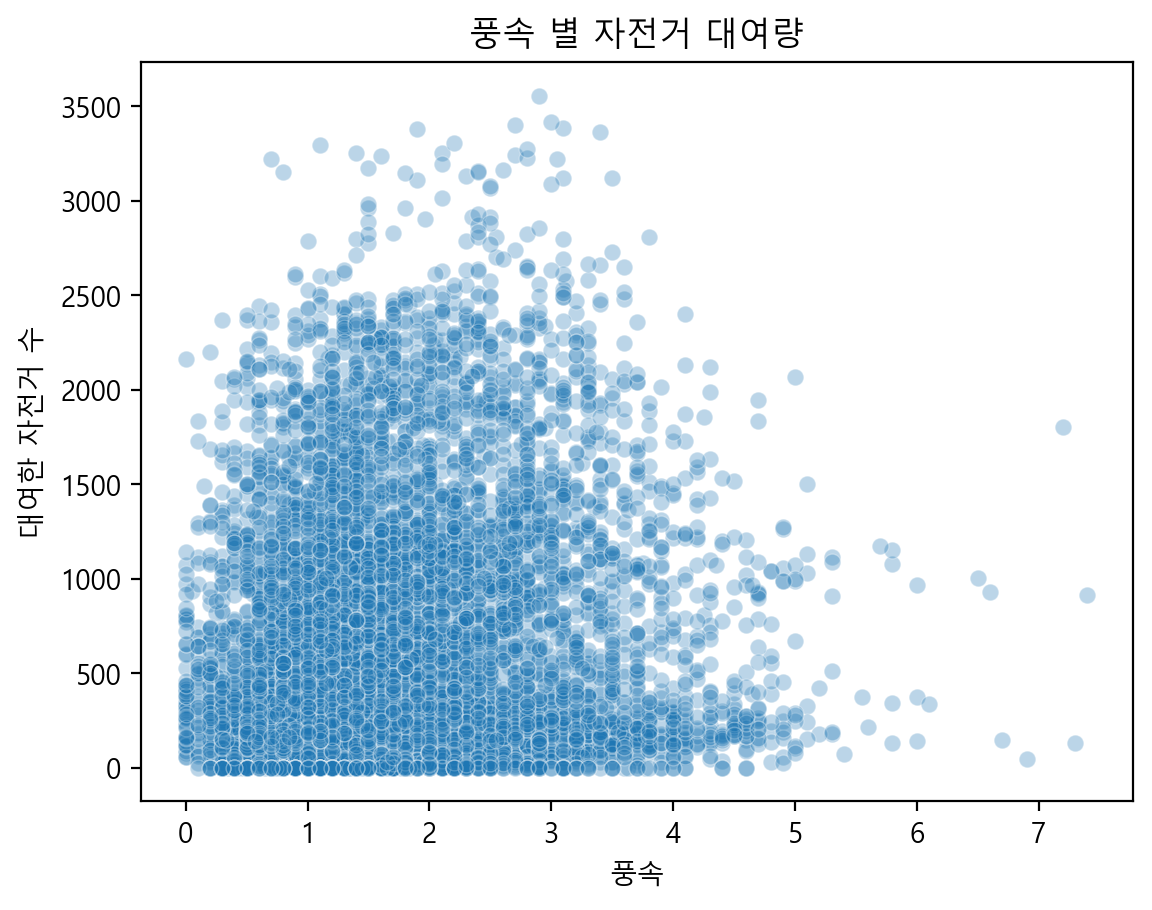

In [19]:
# 풍속에 따른 대여량 나타내기
# 풍속이 낮을수록 대여량이 많다는걸 알 수 있음

sns.scatterplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df_train, alpha=0.3)
plt.title("풍속 별 자전거 대여량")
plt.xlabel('풍속')
plt.ylabel('대여한 자전거 수')

Text(0, 0.5, '대여한 자전거 수')

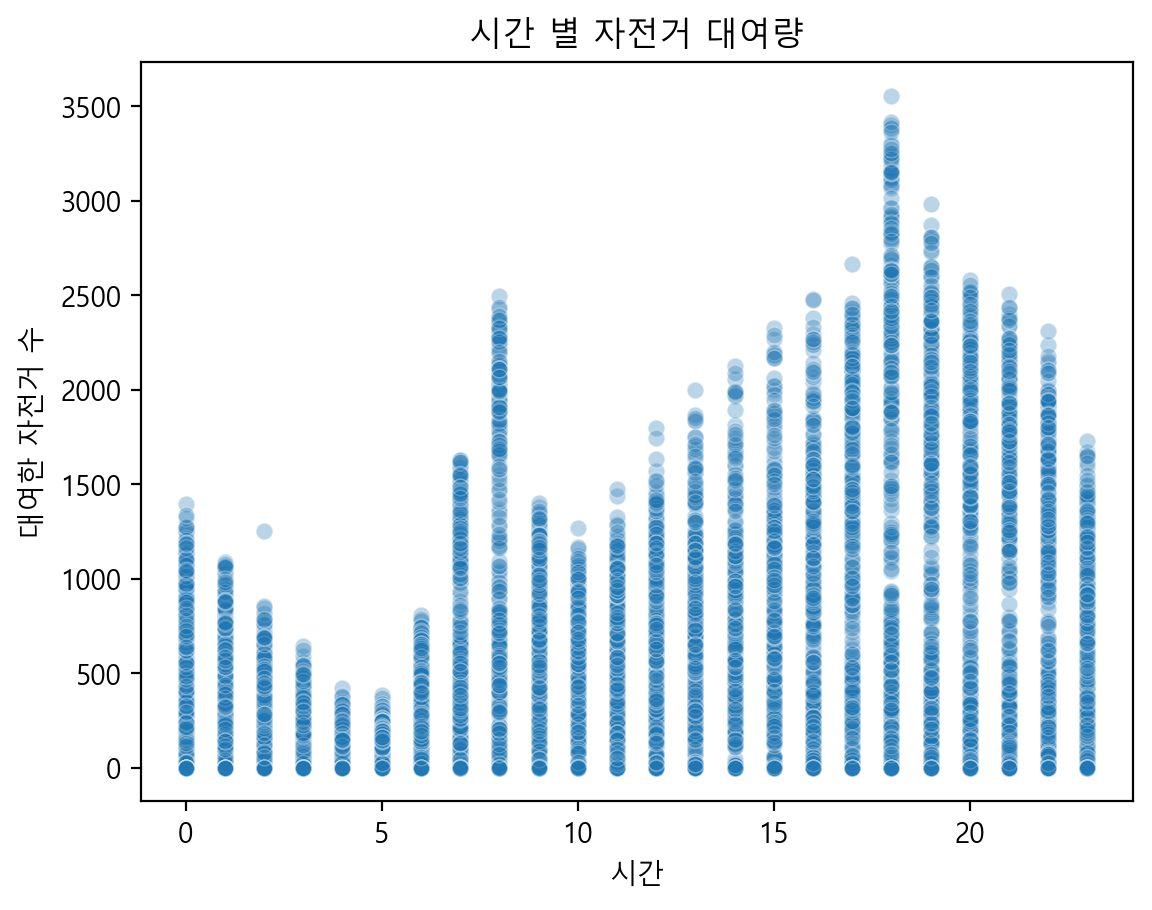

In [30]:
# 시간에 따른 자전거 대여량 나타내기 
# 18시(퇴근시간)에 자전거 대여량이 가장 많다는걸 확인할 수 있음

sns.scatterplot(x='Hour', y='Rented Bike Count', data=df_train, alpha=0.3)
plt.title("시간 별 자전거 대여량")
plt.xlabel('시간')
plt.ylabel('대여한 자전거 수')

Text(0, 0.5, '대여량')

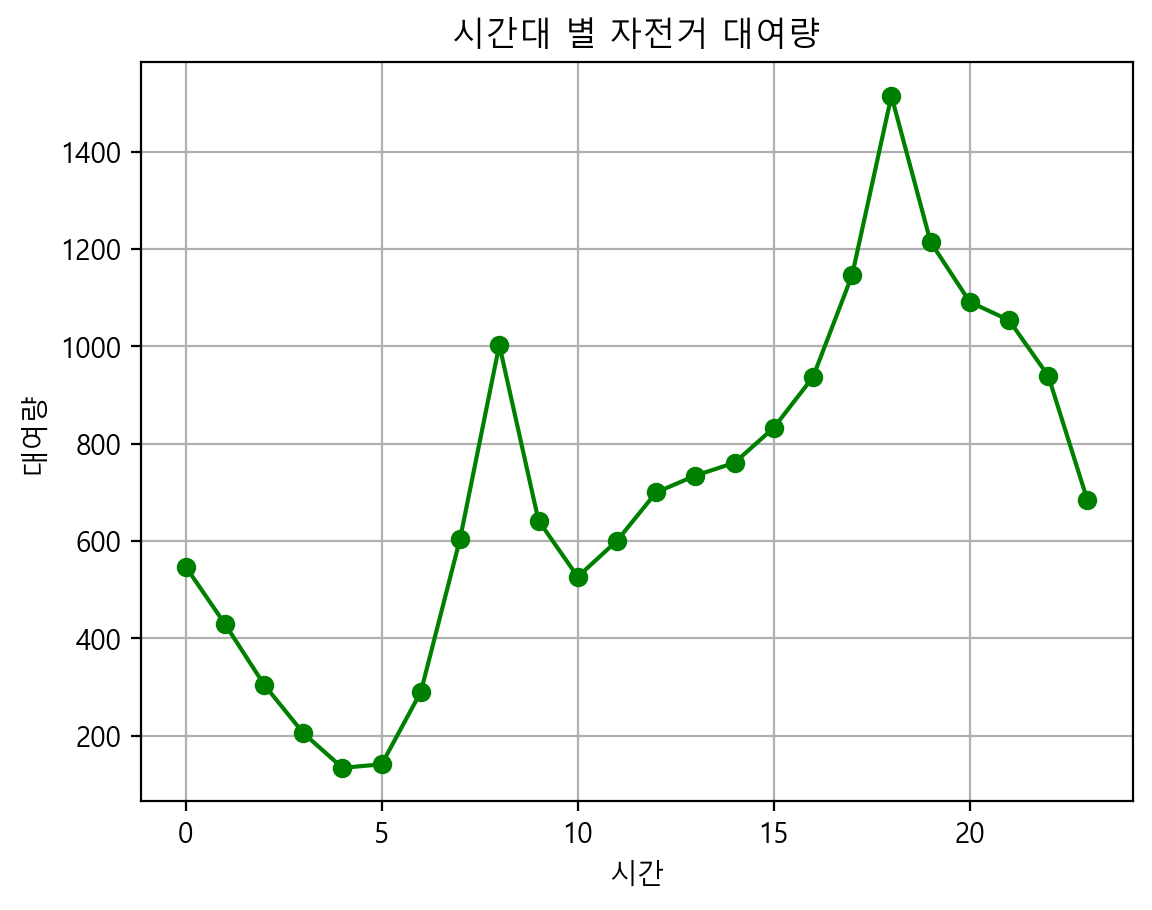

In [29]:
df_train.groupby('Hour').mean()    # 시간 별 각 항목에 대한 평균 값 구하기 
df_train.groupby('Hour').mean()['Rented Bike Count']     # 시간 별 대여량의 평균

# 시간대 별 자전거 대여량 시각화
plt.plot(df_train.groupby('Hour').mean()['Rented Bike Count'], 'go-')
plt.grid()    # 보조선
plt.title("시간대 별 자전거 대여량")
plt.xlabel("시간")
plt.ylabel("대여량")

Text(0.5, 1.0, 'correlation')

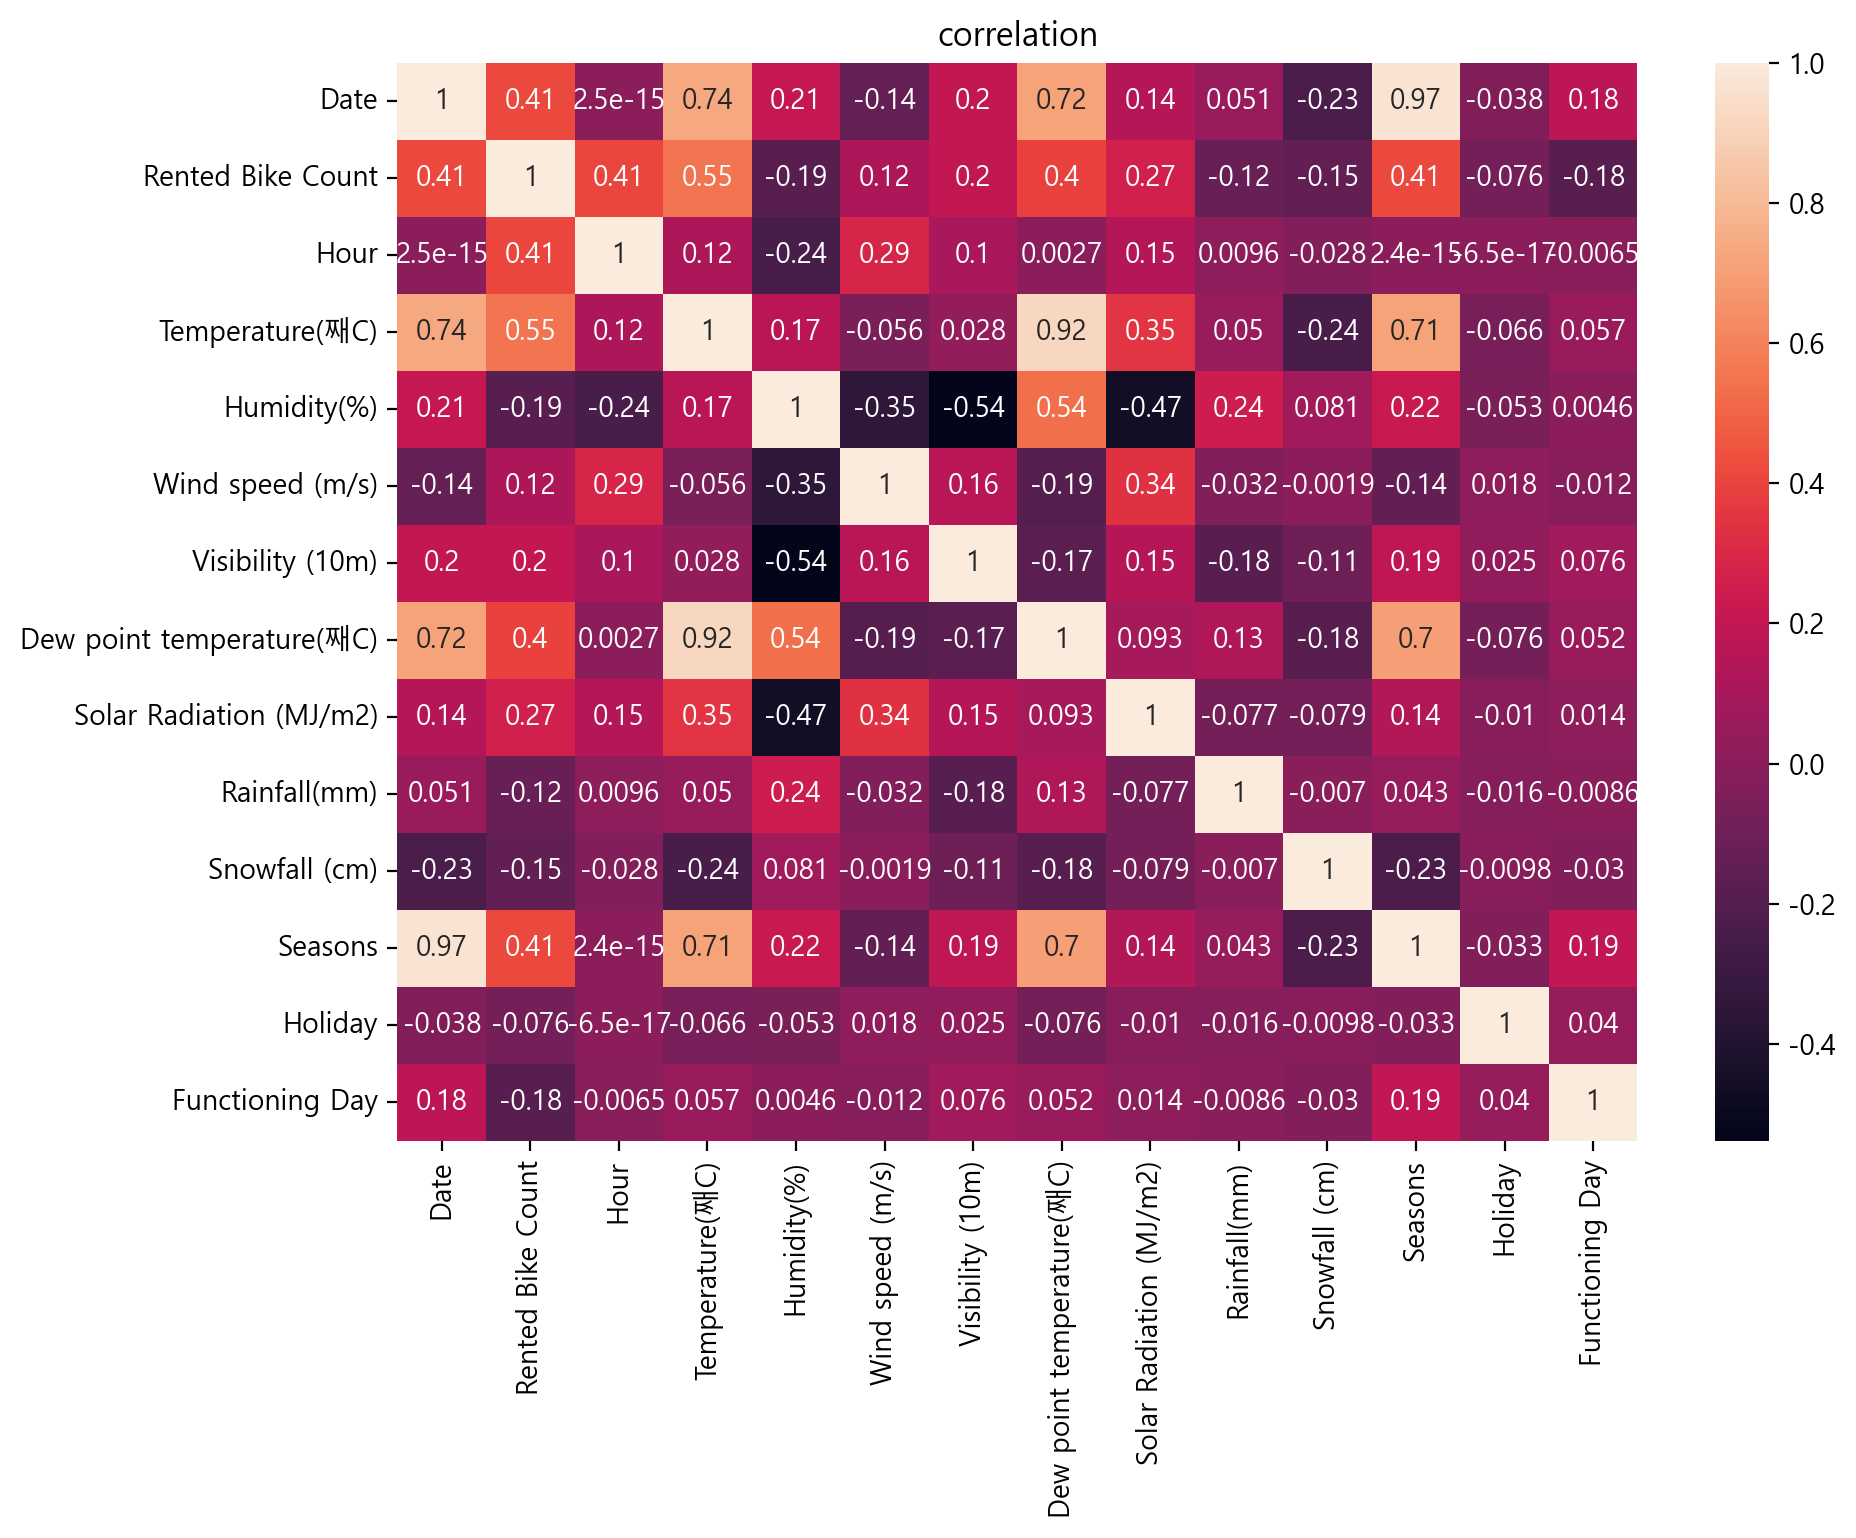

In [ ]:
# 상관계수 구해보기

plt.figure(figsize=(10,7))  
sns.heatmap(df_train.corr(), annot=True)
plt.title("correlation")

# 자전거 대여량과 계절 사이의 상관계수가 가장 높은 것을 확인할 수 있음

## 하이퍼파라미터 튜닝

- 하이퍼파라미터 : 모델의 동작 및 학습 과정을 제어하는 매개변수  
- 같은 모델을 사용해도 하이퍼파라미터 값들에 따라 모델 성능이 달라지기에 모델을 최적화시키기 위해 튜닝은 필수적
- 튜닝 방법: Grid Search , Random Search

### train, valid 데이터셋 나누기

In [24]:
# 학습 세트 만들기 ex) 시험의 기출문제
# 수치형으로 나타내기 어려운 변수인 Date는 제외해야함

X = df_train[['Hour',
 'Temperature(째C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(째C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']]
y= df_train["Rented Bike Count"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.2, random_state=42)

In [32]:
# feature_names 라는 변수에 학습과 예측에 사용할 칼럼명을 가져오기

feature_names = df_train.columns.tolist()
feature_names.remove("Date")
feature_names.remove("Rented Bike Count")
feature_names

['Hour',
 'Temperature(째C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(째C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [33]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다

label_name = "Rented Bike Count"
label_name 

'Rented Bike Count'

In [ ]:
# 주형 데이터를 숫자로 바꾸면 0,1,2,3,4 이런 식일 텐데, 이 숫자가 의미하는 바는 높다, 낮다 하는 수치가 아니라 
# 범주를 나타내기 때문에 이 숫자를 회귀 분석에서 사용할 수 없다. 
# 각각의 범주에 대한 컬럼을 따로 하나씩 더 만들어주고, 0과 1의 값만 갖도록 해야 한다. 
# 모델 학습을 위해서는 문자형태로 되어있는 범주형 데이터를 숫자형으로 바꿔 주어야 한다. 
#pd.get_dummies() 함수는 명목변수*만 0과 1로 원-핫 인코딩을 해준다. 

X = pd.get_dummies(X) 

### RandomizedSearchCV 로 최적의 파라메터 값 찾기

In [34]:
# 머신러닝 알고리즘 가져오기

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


estimators = [DecisionTreeRegressor(random_state=42),
              RandomForestRegressor(random_state=42),
              GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [35]:
from sklearn.model_selection import RandomizedSearchCV

#주요 매개변수
#estimator : 모델 객체 지정
#param_distributions : 하이퍼파라미터 목록을 dictionary 로 전달
#n_iter : 파라미터 검색 횟수
#scoring : 평가 지표
#cv : 교차검증 시 fold 개수
#n_jobs : 사용할 CPU 코어 개수 (1: 기본값, -1: 모든 코어 다 사용)

results = []
for estimator in estimators:
    result = []

    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)

    param_distributions ={ "max_depth": max_depth, "max_features": max_features }
    regressor = RandomizedSearchCV(estimator,
                                   param_distributions,
                                   n_iter=10,
                                   scoring=None,
                                   n_jobs=None,
                                   cv=5,
                                   verbose=2,
                                   random_state=42)
    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=24, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=24, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9724240751000082; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9787030264862167; total time=   0.0s
[CV] END ......max_depth=27, max_features=0.9787

In [36]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model","params","estimator","score","cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.9787030264862167, 'max_dept...","DecisionTreeRegressor(max_depth=8, max_feature...",0.785410,"{'mean_fit_time': [0.06029090881347656, 0.0533..."
1,RandomForestRegressor,"{'max_features': 0.8101414603688697, 'max_dept...","(DecisionTreeRegressor(max_depth=26, max_featu...",0.873880,"{'mean_fit_time': [1.2731355667114257, 0.88112..."
2,GradientBoostingRegressor,"{'max_features': 0.3209912331469225, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.878865,"{'mean_fit_time': [2.0936513423919676, 0.59012..."


표에서 GradientBoostingRegressor의 max_features가 작은 이유  

GradientBoosting은 트리를 여러 개 쌓는 방식이므로 과적합 위험이 크다.  
max_features를 줄이면 트리들이 더 다양한 관점을 보게 되고, 일반화 성능이 좋아질 수 있음.  
따라서 하이퍼파라미터 탐색 결과, 작은 max_features가 과적합을 막고 성능(점수)을 높였기 때문에 최적으로 선택된 것.  

### 여러 모델을 교차검증(CV)으로 비교한 결과 요약표
 
모델별 평균 점수 (score)  

- DecisionTreeRegressor : 0.7854  
- RandomForestRegressor : 0.8739  
- GradientBoostingRegressor : 0.8789  

가장 성능이 좋은 모델  
- GradientBoostingRegressor (점수: 0.8789) : 다른 모델보다 약간 더 높은 점수를 보임.  
- RandomForestRegressor도 성능이 높으며 (0.8739), GradientBoosting과 차이가 크지 않음.  
- DecisionTree는 상대적으로 낮은 점수(0.7854)를 기록함.  

## 하이퍼파라미터로 구한 가장 성능 높은 모델로 예측값 구하기

In [38]:
best_estimator = df_cv.loc[2, "estimator"]
best_estimator

GradientBoostingRegressor(max_depth=9, max_features=0.3209912331469225,
                          random_state=42)

In [39]:
regressor.best_params_

{'max_features': 0.3209912331469225, 'max_depth': 9}

In [40]:
regressor.best_score_

0.8788649144219484

In [41]:
regressor.cv_results_

{'mean_fit_time': array([2.09365134, 0.59012127, 1.76607404, 1.7589323 , 4.20736451,
        2.11304793, 2.01784196, 1.74438515, 0.70360589, 1.44012175]),
 'std_fit_time': array([0.03943787, 0.00740709, 0.01876769, 0.03057515, 0.08819213,
        0.07271198, 0.02566859, 0.05551429, 0.03600309, 0.05725475]),
 'mean_score_time': array([0.03133349, 0.00315633, 0.02927761, 0.03369718, 0.03806939,
        0.01746116, 0.01748843, 0.03319964, 0.00835371, 0.02399969]),
 'std_score_time': array([0.00384167, 0.00631266, 0.00689198, 0.01160286, 0.00810521,
        0.00438191, 0.00417522, 0.0097927 , 0.00712278, 0.0095018 ]),
 'param_max_features': masked_array(data=[0.3730280830709866, 0.3730280830709866,
                    0.3209912331469225, 0.30515480983219306,
                    0.8959918722508937, 0.5335279316516457,
                    0.5836197877312551, 0.3209912331469225,
                    0.3209912331469225, 0.3209912331469225],
              mask=[False, False, False, False, False,

### cross validation으로 학습 세트의 오차 측정하기

In [42]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2)  
y_predict[:5]

array([ 323.09193972,  226.20435569,  401.18220527, 1143.13589664,
       1059.39870259])

<Axes: xlabel='Rented Bike Count'>

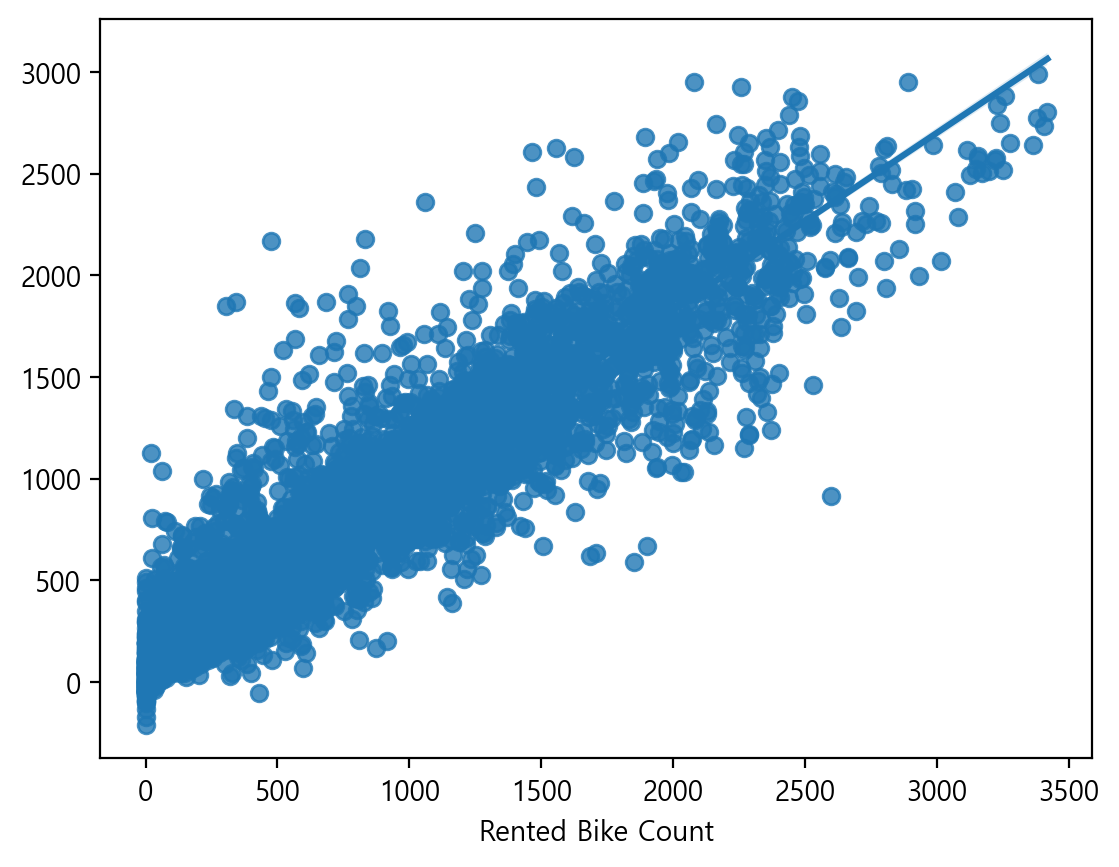

In [43]:
# regplot 으로 선형회귀식 나타내기

sns.regplot( x= y_train , y= y_predict)

In [44]:
# r2_score 구하기
# 1과 가까울수록 예측을 잘하는 것

from sklearn.metrics import r2_score

r2_score(y_train , y_predict)

0.8790601453656317

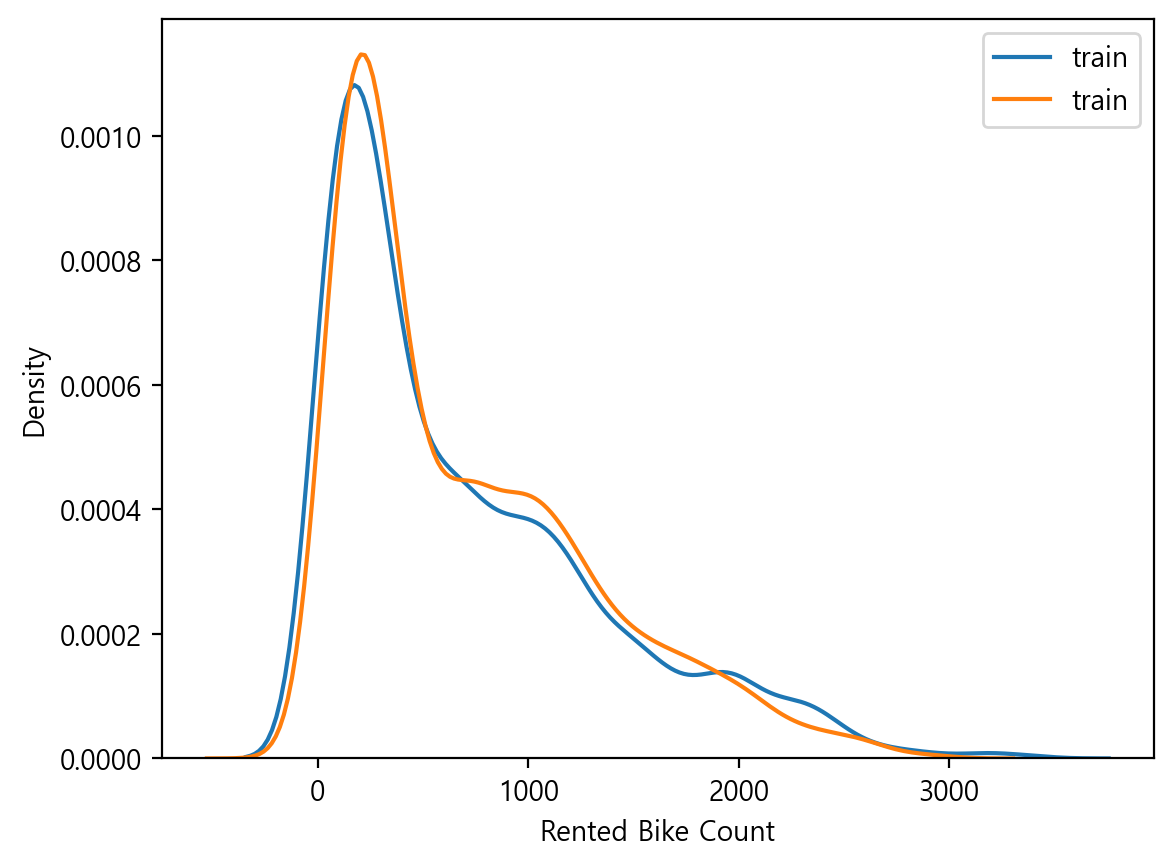

In [45]:
# kdeplot 으로 정답값과 예측값의 분포를 그린다

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_predict, label='train')
plt.legend()
plt.show()

In [47]:
# MAE
# 실제값과 예측값의 차이 구하기
# abs : 절댓값으로 변환
# abs( ).maen() : 차이값의 절댓값의 평균 구하기

error = abs(y_train - y_predict)
error.mean()

143.42081310132843

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

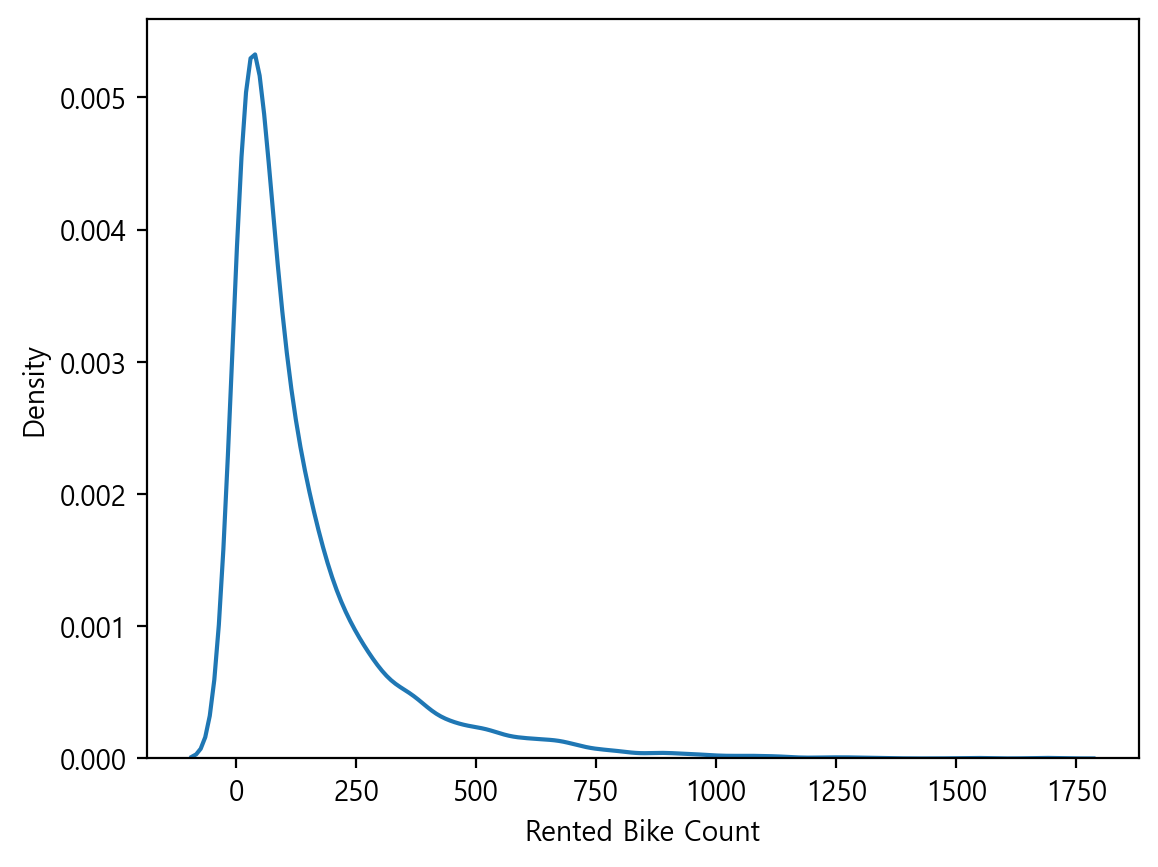

In [ ]:
# 오차값을 시각화해보기

sns.kdeplot(error)

In [49]:
error.describe()

count    6432.000000
mean      143.420813
std       177.424954
min         0.016059
25%        30.974483
50%        79.744194
75%       184.153495
max      1693.623997
Name: Rented Bike Count, dtype: float64

In [50]:
# RMSE
# 구하는 값이 표준편차와 비슷함

np.sqrt(((y_train - y_predict) ** 2).mean())

228.13208797611895

In [51]:
# 피처의 중요도를 추출하기

best_estimator.feature_importances_

array([0.26430511, 0.23123061, 0.0777286 , 0.02753689, 0.03156769,
       0.05054631, 0.07913944, 0.04355031, 0.00094662, 0.12129914,
       0.00452801, 0.06762126])

<Axes: >

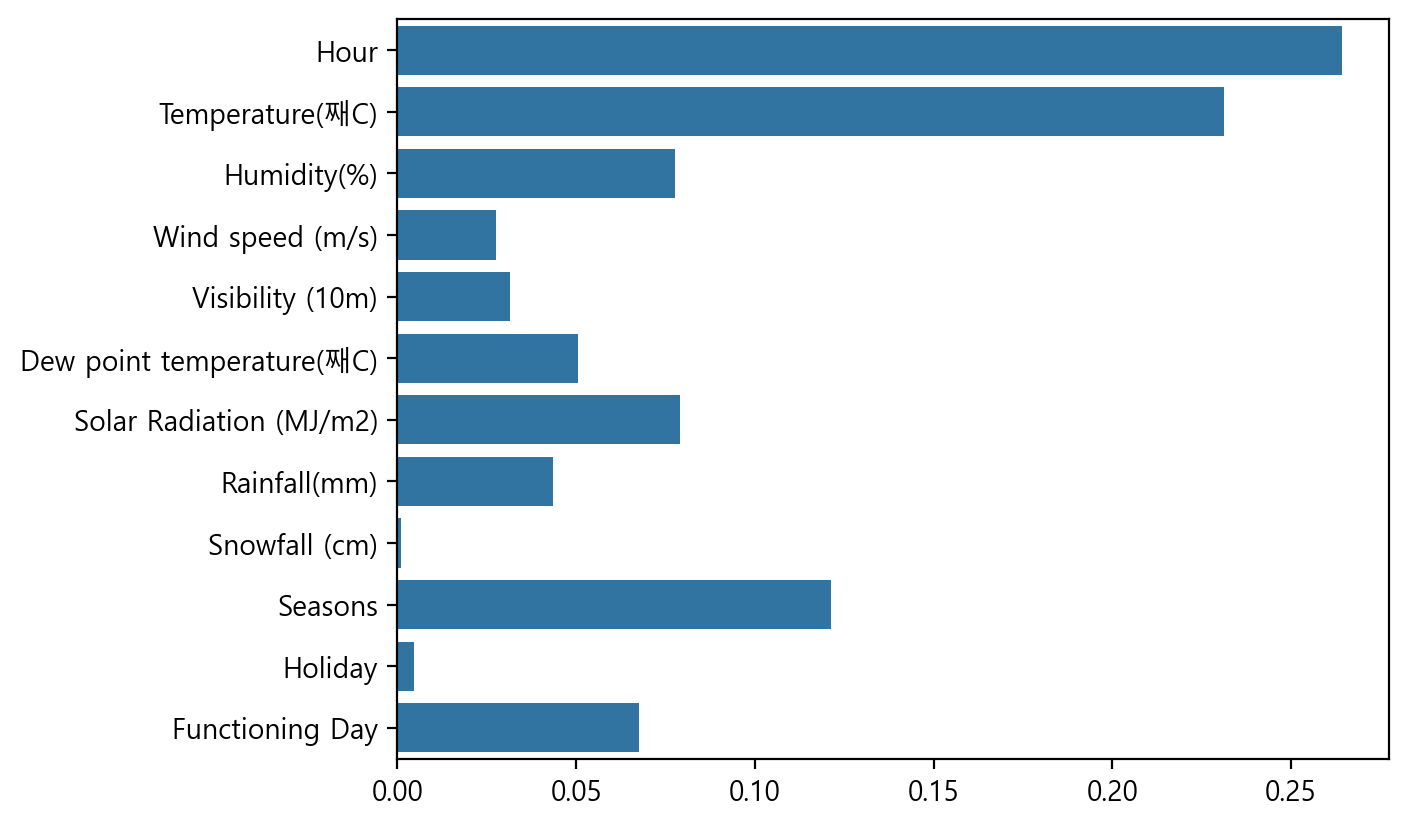

In [52]:
# 피처의 중요도 시각화하기

sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

## 대여량 예측해보기

In [53]:
# test 데이터셋 불러오기

df_test = pd.read_csv("C:/Users/강태희/Documents/data/test.csv")
df_test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [54]:
df_test.shape

(720, 13)

In [56]:
# 결측값 확인해보기

df_test.isna().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

### test 데이터셋도 train 데이터셋에서 한 것처럼 변수 변환해야함

In [57]:
# 보간법으로 Temperature와 Wind speed 결측값 채우기

df_test['Temperature(째C)'] = df_test['Temperature(째C)'].interpolate(method='linear')
df_test['Wind speed (m/s)'] = df_test['Wind speed (m/s)'].interpolate(method='linear')

In [58]:
# Seasons의 결측값 채우기

# 먼저 Date 열을 datetime 형식으로 변환
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d/%m/%Y')

# 월을 추출해서 계절을 정의하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Seasons 결측값만 해당 함수로 채우기
df_test['Seasons'] = df_test['Seasons'].fillna(df_test['Date'].dt.month.map(get_season))

In [59]:
#지금 Seasons이랑 Holiday, Functioning Day 와 같은 범주형 변수를 수치형 변수로 나타내야함. 
# saeson은 겨울 봄 여름 가을 순서로 1, 2,3,4의 값을 갖도록 하고 holiday에서는 no holiday의 값을 0으로, holiday의 값을 1로 변환하기
# functionind day에서 가능한 날을 0으로, 아닌 날을 1로 설정하기

df_test['Seasons'] = df_test['Seasons'].map({'Winter': 1,'Spring': 2,'Summer': 3,'Autumn': 4})

df_test['Holiday'] = df_test['Holiday'].map({'No Holiday': 0,'Holiday': 1})

df_test['Functioning Day']= df_test['Functioning Day'].map({'Yes': 0,'No': 1})

In [60]:
display(df_test.head())
display(df_test.tail())

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-11-01,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,4,0,0
1,2018-11-01,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,4,0,0
2,2018-11-01,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,4,0,0
3,2018-11-01,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,4,0,0
4,2018-11-01,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,4,0,0


,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
715,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,0
716,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,0
717,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,0
718,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,0
719,2018-11-30,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,4,0,0


### 테스트해보기

In [64]:
X_test = df_test[feature_names].copy()

In [ ]:

X_test = pd.get_dummies(X_test)

In [65]:
# final model에 가장 성능이 좋았던 GradientBoostingRegressor 넣기

final_model= GradientBoostingRegressor(max_depth=9, max_features=0.3209912331469225,
                          random_state=42)

In [67]:
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, max_features=0.3209912331469225,
                          random_state=42)

In [69]:
df_test['Rented Bike Count'] = final_model.predict(X_test)

In [71]:
y_test = df_test['Rented Bike Count']

In [ ]:
# 변수의 중요도 시각화하기

sns.barplot(x=.feature_importances_, y=feature_names)